In [1]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [3]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# function to display images in the training set
def display(img):
    img = img / 2  + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [5]:
## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

### Helper function 
To display images in the training set

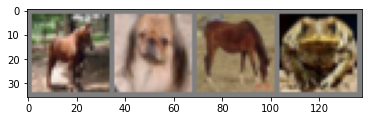

horse   dog horse  frog


In [6]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [7]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

In [18]:
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here. 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.202
[1, 1750] loss: 2.094
[1, 2000] loss: 2.035
[1, 2250] loss: 1.983
[1, 2500] loss: 1.948
[1, 2750] loss: 1.951
[1, 3000] loss: 1.862
[1, 3250] loss: 1.844
[1, 3500] loss: 1.791
[1, 3750] loss: 1.751
[1, 4000] loss: 1.760
[1, 4250] loss: 1.711
[1, 4500] loss: 1.719
[1, 4750] loss: 1.688
[1, 5000] loss: 1.681
[1, 5250] loss: 1.631
[1, 5500] loss: 1.668
[1, 5750] loss: 1.693
[1, 6000] loss: 1.646
[1, 6250] loss: 1.572
[1, 6500] loss: 1.605
[1, 6750] loss: 1.545
[1, 7000] loss: 1.559
[1, 7250] loss: 1.528
[1, 7500] loss: 1.526
[1, 7750] loss: 1.530
[1, 8000] loss: 1.505
[1, 8250] loss: 1.535
[1, 8500] loss: 1.484
[1, 8750] loss: 1.493
[1, 9000] loss: 1.530
[1, 9250] loss: 1.509
[1, 9500] loss: 1.470
[1, 9750] loss: 1.479
[1, 10000] loss: 1.403
[1, 10250] loss: 1.473
[1, 10500] loss: 1.451
[1, 10750] loss: 1.426
[1, 11000] loss: 1.417
[1, 11250] loss: 1.459
[1, 115

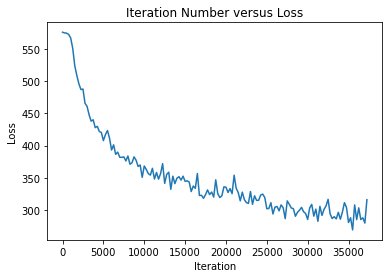

In [19]:
## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
    iters = len(running_loss_list)*250
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(1, iters, 250), np.array(running_loss_list))
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    ax.set_title("Iteration Number versus Loss")
    return fig
    
plot_loss_curve(running_loss_list).savefig('data/solutions/question_3_1.pdf', format='pdf', bbox_inches='tight')

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


In [23]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here. 
        optimizer.zero_grad()
        outputs = net(inputs.cuda())
        loss = criterion(outputs.cuda(), labels.cuda())
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cuda().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.202
[1, 1750] loss: 2.095
[1, 2000] loss: 2.036
[1, 2250] loss: 1.984
[1, 2500] loss: 1.949
[1, 2750] loss: 1.951
[1, 3000] loss: 1.862
[1, 3250] loss: 1.843
[1, 3500] loss: 1.790
[1, 3750] loss: 1.752
[1, 4000] loss: 1.761
[1, 4250] loss: 1.710
[1, 4500] loss: 1.718
[1, 4750] loss: 1.690
[1, 5000] loss: 1.683
[1, 5250] loss: 1.635
[1, 5500] loss: 1.667
[1, 5750] loss: 1.702
[1, 6000] loss: 1.648
[1, 6250] loss: 1.573
[1, 6500] loss: 1.603
[1, 6750] loss: 1.548
[1, 7000] loss: 1.560
[1, 7250] loss: 1.519
[1, 7500] loss: 1.526
[1, 7750] loss: 1.531
[1, 8000] loss: 1.508
[1, 8250] loss: 1.541
[1, 8500] loss: 1.492
[1, 8750] loss: 1.487
[1, 9000] loss: 1.535
[1, 9250] loss: 1.512
[1, 9500] loss: 1.469
[1, 9750] loss: 1.484
[1, 10000] loss: 1.403
[1, 10250] loss: 1.470
[1, 10500] loss: 1.453
[1, 10750] loss: 1.430
[1, 11000] loss: 1.429
[1, 11250] loss: 1.464
[1, 115

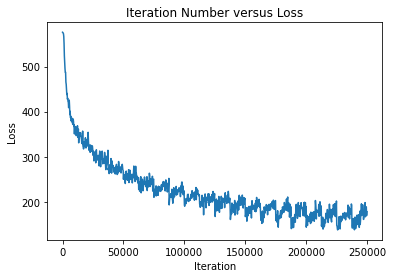

In [25]:
plot_loss_curve(running_loss_list).savefig('data/solutions/question_3_2.pdf', format='pdf', bbox_inches='tight')

### Testing the network

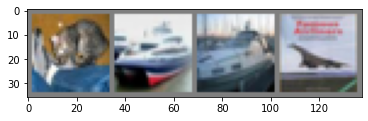

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


In [20]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [21]:
### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct / total * 100
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 60 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [35]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    INPUTS 
    num_epochs: number of training epochs
    use_gpu: False by default. If true, load the model and data to GPU for training
    lr: learning rate for SGD optimizer
    momentum: momentum for SGD optimizer
    model_save_path: save path for the trained model 

    OUTPUTS
    returns running_loss_list: which stores the loss averaged over a minibatch of size 250
    """
  
    ## complete the code. 
    if use_gpu:
        net = Net().cuda()
    else:
        net = Net()
        
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    running_loss_list = [] 
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            #===============================================#
            if use_gpu:
                optimizer.zero_grad()
                outputs = net(inputs.cuda())
                loss = criterion(outputs.cuda(), labels.cuda())
            else:
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            #===============================================#
            # print statistics
            if use_gpu:
                running_loss += loss.cuda().item()
            else:
                running_loss += loss.cpu().item()
            if i % 250 == 249:    # print every 250 mini-batches
                #print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
                running_loss_list.append(running_loss)
                running_loss = 0.0
    return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
    ### complete the code to compute accuracy and store it as the variable acc 
    net = Net()
    net.load_state_dict(torch.load(model_path))
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total* 100
    print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Batch Size: 4
Number of Epochs: 20
Accuracy of the network on the 10000 test images: 61 %


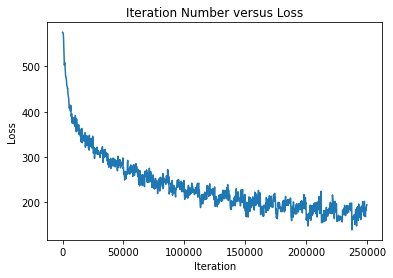

In [48]:
# batch size 4, num epochs 20
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)
batch_4_epo_20 = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.09, model_save_path='./net.pth')
plot_loss_curve(batch_4_epo_20).savefig('data/solutions/question_3_5_4_20.pdf', format='pdf', bbox_inches='tight')
print("Batch Size: 4")
print("Number of Epochs: 20")
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 4
Number of Epochs: 5
Accuracy of the network on the 10000 test images: 61 %


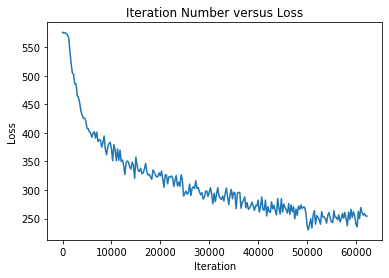

In [51]:
# batch size 4, num epochs 5
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)
batch_4_epo_5 = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.09, model_save_path='./net.pth')
plot_loss_curve(batch_4_epo_5).savefig('data/solutions/question_3_5_4_5.pdf', format='pdf', bbox_inches='tight')
print("Batch Size: 4")
print("Number of Epochs: 5")
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 16
Number of Epochs: 5
Accuracy of the network on the 10000 test images: 61 %


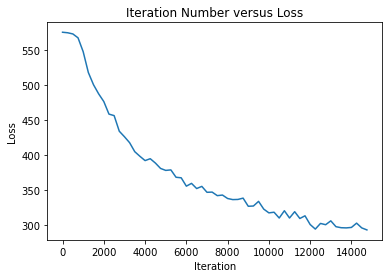

In [53]:
# batch size 16, num epochs 5
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False, num_workers=2)
batch_16_epo_5 = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.09, model_save_path='./net.pth')
plot_loss_curve(batch_16_epo_5).savefig('data/solutions/question_3_5_16_5.pdf', format='pdf', bbox_inches='tight')
print("Batch Size: 16")
print("Number of Epochs: 5")
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 16
Number of Epochs: 20
Accuracy of the network on the 10000 test images: 77 %


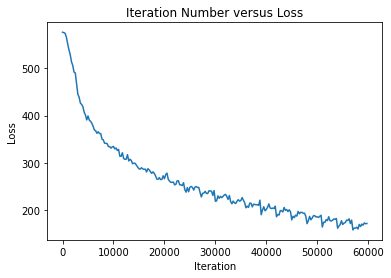

In [54]:
# batch size 16, num epochs 20
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=False, num_workers=2)
batch_16_epo_20 = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.09, model_save_path='./net.pth')
plot_loss_curve(batch_16_epo_20).savefig('data/solutions/question_3_5_16_20.pdf', format='pdf', bbox_inches='tight')
print("Batch Size: 16")
print("Number of Epochs: 20")
test(test_loader=test_loader, model_path='./net.pth')